In [35]:
import pandas as pd
dfUK=pd.read_csv("UK_Tank_Production.tsv",sep="\t")
dfType=pd.read_csv("TankClassification.tsv",sep="\t")
display(dfUK)
display(dfType)

,Tank,Year,Count
0,Cavalier,1939,0
1,Cavalier,1940,0
2,Cavalier,1941,0
3,Cavalier,1942,0
4,Cavalier,1945,0
...,...,...,...
198,Sherman DD,1944,693
199,Sherman 17-pdr,1944,1783
200,Sherman 17-pdr,1945,291
201,M-10 17-pdr,1944,790


,Designation,Category
0,Light Mark VI 1,Light
1,Tetrarch,Light
2,Harry Hopkins,Light
3,A.11 Infantry,Infantry
4,Valentine,Infantry
5,Churchill,Infantry
6,Matilda,Infantry
7,Heavy Churchill,Infantry
8,Cavalier,Cruiser
9,Centaur,Cruiser


In [36]:
df = dfUK.merge(dfType,left_on='Tank',right_on='Designation')
display(df)

,Tank,Year,Count,Designation,Category
0,Cavalier,1939,0,Cavalier,Cruiser
1,Cavalier,1940,0,Cavalier,Cruiser
2,Cavalier,1941,0,Cavalier,Cruiser
3,Cavalier,1942,0,Cavalier,Cruiser
4,Cavalier,1945,0,Cavalier,Cruiser
...,...,...,...,...,...
198,M-10 17-pdr,1941,0,M-10 17-pdr,Conversion
199,M-10 17-pdr,1942,0,M-10 17-pdr,Conversion
200,M-10 17-pdr,1943,0,M-10 17-pdr,Conversion
201,M-10 17-pdr,1944,790,M-10 17-pdr,Conversion


In [37]:
pvt=pd.pivot_table( data=df,
                index=['Category','Tank'],
                values='Count',
                aggfunc='sum',
                columns='Year',
                margins=True)
display(pvt)

Year                          1939  1940  1941  1942  1943  1944  1945    All
Category   Tank                                                              
Conversion Cavalier OP           0     0     0     0     0    17     0     17
           Centaur AA            0     0     0     0     0   149     0    149
           Centaur Bulldozer     0     0     0     0     0    74    23     97
           Crusader Hulls        0     0     0     0   239     0     0    239
           M-10 17-pdr           0     0     0     0     0   790   225   1015
           Sherman 17-pdr        0     0     0     0     0  1783   291   2074
           Sherman DD            0     0     0     0     0   693     0    693
           Valentine DD          0     0     0     0     0   247     0    247
           Valentine SP          0     0     0     0     0   349   178    527
Cruiser    A.10 Cruiser          1   159    10     0     0     0     0    170
           A.9 Cruiser          76    49     0     0     0     0     0    125
           Cavalier              0     0     0     0   375   105     0    480
           Centaur               0     0     0     2  1252   274     0   1528
           Challenger            0     0     0     0     0   145    47    192
           Comet                 0     0     0     0     0   143   480    623
           Covenanter            0     9   746   986    29     0     0   1770
           Cromwell              0     0     0     1   421  1935    79   2436
           Cromwell X/III        0     0     0     0   111     0     0    111
           Cruiser III          65     0     0     0     0     0     0     65
           Cruiser IV            8   257     5     0     0     0     0    270
           Crusader              0     2   652  2340  1684     0     0   4678
Infantry   A.11 Infantry       106    33     0     0     0     0     0    139
           Churchill             0     0   690  1731  1360   495     0   4276
           Heavy Churchill       0     0     0     0     4   567   346    917
           Matilda              24   361  1040  1330   153     0     0   2908
           Valentine             0   354  1621  2214  1798   280     0   6267
Light      Harry Hopkins         0     0     0     6    30    56    12    104
           Light Mark VI 1    1182   140     0     0     0     0     0   1322
           Tetrarch              0    15    73    12     0     0     0    100
All                           1462  1379  4837  8622  7456  8102  1681  33539

In [38]:
!pip install tabulate
from tabulate import tabulate

table = [["Sun", 696000, 1989100000], ["Earth", 6371, 5973.6], ["Moon", 1737, 73.5], ["Mars", 3390, 641.85]]
headers = ["Planet", "R (km)", "mass (x 10^29 kg)"]
print(tabulate(table, headers, tablefmt="pretty"))

+--------+--------+-------------------+
| Planet | R (km) | mass (x 10^29 kg) |
+--------+--------+-------------------+
|  Sun   | 696000 |    1989100000     |
| Earth  |  6371  |      5973.6       |
|  Moon  |  1737  |       73.5        |
|  Mars  |  3390  |      641.85       |
+--------+--------+-------------------+


In [39]:
headers = ["Categor/Name","1939","1940","1941","1942","1943","1944","1945","Total"]
print(tabulate(pvt, headers, tablefmt="pretty"))

+-------------------------------------+------+------+------+------+------+------+------+-------+
|            Categor/Name             | 1939 | 1940 | 1941 | 1942 | 1943 | 1944 | 1945 | Total |
+-------------------------------------+------+------+------+------+------+------+------+-------+
|    ('Conversion', 'Cavalier OP')    |  0   |  0   |  0   |  0   |  0   |  17  |  0   |  17   |
|    ('Conversion', 'Centaur AA')     |  0   |  0   |  0   |  0   |  0   | 149  |  0   |  149  |
| ('Conversion', 'Centaur Bulldozer') |  0   |  0   |  0   |  0   |  0   |  74  |  23  |  97   |
|  ('Conversion', 'Crusader Hulls')   |  0   |  0   |  0   |  0   | 239  |  0   |  0   |  239  |
|    ('Conversion', 'M-10 17-pdr')    |  0   |  0   |  0   |  0   |  0   | 790  | 225  | 1015  |
|  ('Conversion', 'Sherman 17-pdr')   |  0   |  0   |  0   |  0   |  0   | 1783 | 291  | 2074  |
|    ('Conversion', 'Sherman DD')     |  0   |  0   |  0   |  0   |  0   | 693  |  0   |  693  |
|   ('Conversion', 'Valentine 

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
display(df)

,Tank,Year,Count,Designation,Category
0,Cavalier,1939,0,Cavalier,Cruiser
1,Cavalier,1940,0,Cavalier,Cruiser
2,Cavalier,1941,0,Cavalier,Cruiser
3,Cavalier,1942,0,Cavalier,Cruiser
4,Cavalier,1945,0,Cavalier,Cruiser
...,...,...,...,...,...
198,M-10 17-pdr,1941,0,M-10 17-pdr,Conversion
199,M-10 17-pdr,1942,0,M-10 17-pdr,Conversion
200,M-10 17-pdr,1943,0,M-10 17-pdr,Conversion
201,M-10 17-pdr,1944,790,M-10 17-pdr,Conversion


In [42]:
dfgrp=df.groupby('Year')

C:\Users\Mark\AppData\Local\Temp\ipykernel_16688\4084980592.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year',y='Count',data=df, ci=None, hue='Category')


<Axes: xlabel='Year', ylabel='Count'>

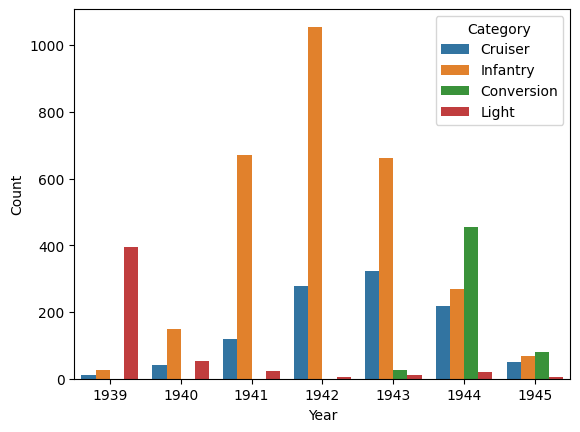

In [43]:
sns.barplot(x='Year',y='Count',data=df, ci=None, hue='Category')

In [44]:
print(df)

            Tank  Year  Count  Designation    Category
0       Cavalier  1939      0     Cavalier     Cruiser
1       Cavalier  1940      0     Cavalier     Cruiser
2       Cavalier  1941      0     Cavalier     Cruiser
3       Cavalier  1942      0     Cavalier     Cruiser
4       Cavalier  1945      0     Cavalier     Cruiser
..           ...   ...    ...          ...         ...
198  M-10 17-pdr  1941      0  M-10 17-pdr  Conversion
199  M-10 17-pdr  1942      0  M-10 17-pdr  Conversion
200  M-10 17-pdr  1943      0  M-10 17-pdr  Conversion
201  M-10 17-pdr  1944    790  M-10 17-pdr  Conversion
202  M-10 17-pdr  1945    225  M-10 17-pdr  Conversion

[203 rows x 5 columns]


Text(0, 0.5, 'Units')

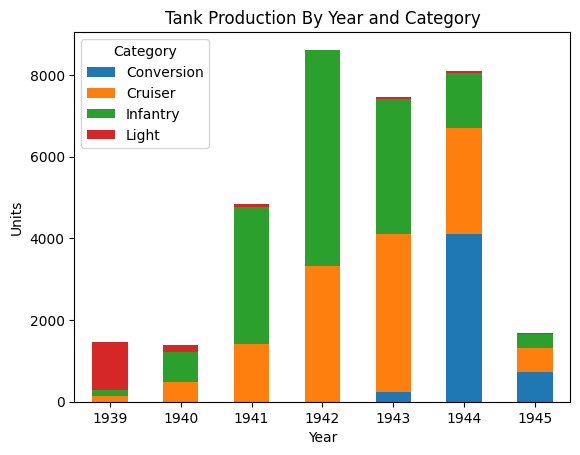

In [46]:
agg_tips = df.groupby(['Year', 'Category'])['Count'].sum().unstack().fillna(0)
agg_tips.plot(kind='bar', stacked=True)
plt.title('Tank Production By Year and Category')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Units')

In [51]:
# ! pip install dataframe_image
import dataframe_image as dfi
dfi.export(pvt, "table.png")

In [52]:
df.groupby(['Year', 'Category'])['Count'].sum()

Year  Category  
1939  Conversion       0
      Cruiser        150
      Infantry       130
      Light         1182
1940  Conversion       0
      Cruiser        476
      Infantry       748
      Light          155
1941  Conversion       0
      Cruiser       1413
      Infantry      3351
      Light           73
1942  Conversion       0
      Cruiser       3329
      Infantry      5275
      Light           18
1943  Conversion     239
      Cruiser       3872
      Infantry      3315
      Light           30
1944  Conversion    4102
      Cruiser       2602
      Infantry      1342
      Light           56
1945  Conversion     717
      Cruiser        606
      Infantry       346
      Light           12
Name: Count, dtype: int64

In [53]:
df.groupby(['Year', 'Category'])['Count'].sum().unstack()

Category,Conversion,Cruiser,Infantry,Light
Year,,,,
1939,0,150,130,1182
1940,0,476,748,155
1941,0,1413,3351,73
1942,0,3329,5275,18
1943,239,3872,3315,30
1944,4102,2602,1342,56
1945,717,606,346,12



![TANK](table.png)